# Question 1

Three examples of ways to convert similarities into distances are:
1. $\frac{1-similarities}{similarities}$ $\forall similarities \neq 0$, 1 otherwise
2. $-ln(similarities)$
3. $1 - similarities$

I chose to use $1 - similarities$ because it was the simplest to implement and provides a direct "mirrored" comparison to the similarities numbers across the 0.5 line. 
$\pagebreak$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance

# what each data point is called:
names = ["football","baseball","basketball","tennis","softball","canoeing",\
         "handball","rugby","hockey","ice hockey","swimming","track","boxing",\
         "volleyball","lacrosse","skiing","golf","polo","surfing","wrestling","\
         gymnastics"]

 # load the csv provided on bcourses
similarities = np.loadtxt(open("similarities.csv", "rb"), delimiter=",",\
                             skiprows=1)

distances = (1-similarities) # How should we convert similarities to distances?

D = 2 # How many dimensions we are going to use
N = distances.shape[0] # the number of items
assert(distances.shape[1] == N and N==len(names))

def dist(a,b):
    # Compute the Euclidean distance between two locations (np arrays) a and b
    # Thus, dist(pos[1], pos[2]) gives the distance between the locations for items
    # 1 and 2
    return distance.euclidean(a,b)

def stress(p, i):
    # Take a matrix of positions (called here "p") and return the stress at p[i]
    stress = 0
    for j in range(p.shape[0]):
        if i != j:
            stress += (distances[i][j] - (dist(p[i],p[j])))**2
    return stress
    
def add_delta(p, i, d, delta):
    # This is a helper function that will make a new vector which is the same as p 
    # (a position matrix), except that
    # p[i,d] has been increased by delta (which may be positive or negative)
    v = np.array(p)
    v[i, d] += delta
    return v

def compute_full_gradient(p, delta = 0.001):
    # Numerically compute the full gradient of stress at a position p
    # This should return a matrix whose elements are the gradient of stress at p with respect to each [i,d] coordinate
    final = np.zeros(p.shape)
    for i in range(np.size(p,0)):
        for d in range(p[i].size):
            final[i][d] = (stress(add_delta(p,i,d,delta),i)-stress(add_delta(p,i,d,-delta),i))/(2*delta)
    return final

In [ ]:
# Pick a position for each point. Note this is an NxD matrix
# so that pos[11,1] is the y coordinate for the 11th item
# and pos[11] is a (row) vector for the position of the 11th item
pos = np.random.normal(0.0,1.0,size=(N,D))
stress_list = []
curr = 1
last = -1
# Now go through and adjust the position to minimize the stress
while abs(curr - last) > 0.001:
    pos = pos - compute_full_gradient(pos)*0.01
    stress_list.append(sum([stress(pos, i) for i in range(len(names))]))
    last = curr
    curr = stress_list[-1]

x = []
y = []
for i in range(np.size(pos,0)):
    x.append(pos[i][0])
    y.append(pos[i][1])

$\pagebreak$

# Question 2

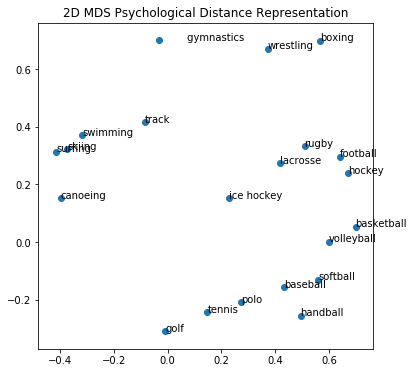

In [5]:
# Question 2fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(x,y)
plt.title("2D MDS Psychological Distance Representation")

for i in range(len(names)):
    ax.annotate(names[i], (x[i], y[i]))

My intuition agrees with the organization of the plot. All of the water/frozen water sports (swimming, surfing, canoeing, skiing, and ice hockey) are relatively close to each other, the contact sports (boxing, wrestling, football, and rugby) are in the same general area, and sports with sticks (golf, hockey, polo, baseball, etc.) and sports with balls (softball, baseball, handball, etc.) are also grouped. $\pagebreak$

# Question 3a

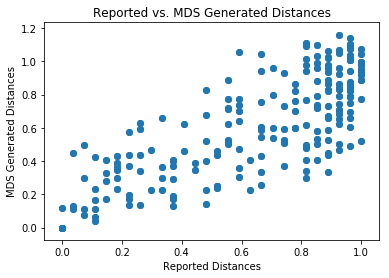

In [7]:
new_dist = np.zeros_like(distances)
for x in range(distances.shape[0]):
    for y in range(distances.shape[1]):
        new_dist[x,y] = dist(pos[x],pos[y])
        
plt.scatter(distances.flatten(), new_dist.flatten())
plt.xlabel("Reported Distances")
plt.ylabel("MDS Generated Distances")
plt.title("Reported vs. MDS Generated Distances")
plt.show()

In my opinion, the correlation plot looks pretty good. There is a definite positive association between the two distances (at a 1:1 ratio), even though there is a lot of noise/variability in the data. $\pagebreak$

# Question 3b

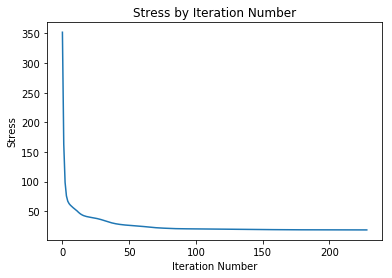

In [8]:
plt.plot(stress_list)
plt.xlabel("Iteration Number")
plt.ylabel("Stress")
plt.title("Stress by Iteration Number")
plt.show()

Using just the plot to figure out where to stop the algorithm, the point where the stress value plateaus on the is the # of iterations to stop at. If I didn't already have my MDS algorithm stop when the stress value plateaus (decreasing only by an insignificant amount (<0.001) at each iteration), I would say based on the plot I would consider ~150 iterations to be a reasonable stopping point. My implementation stops automatically around ~220. $\pagebreak$

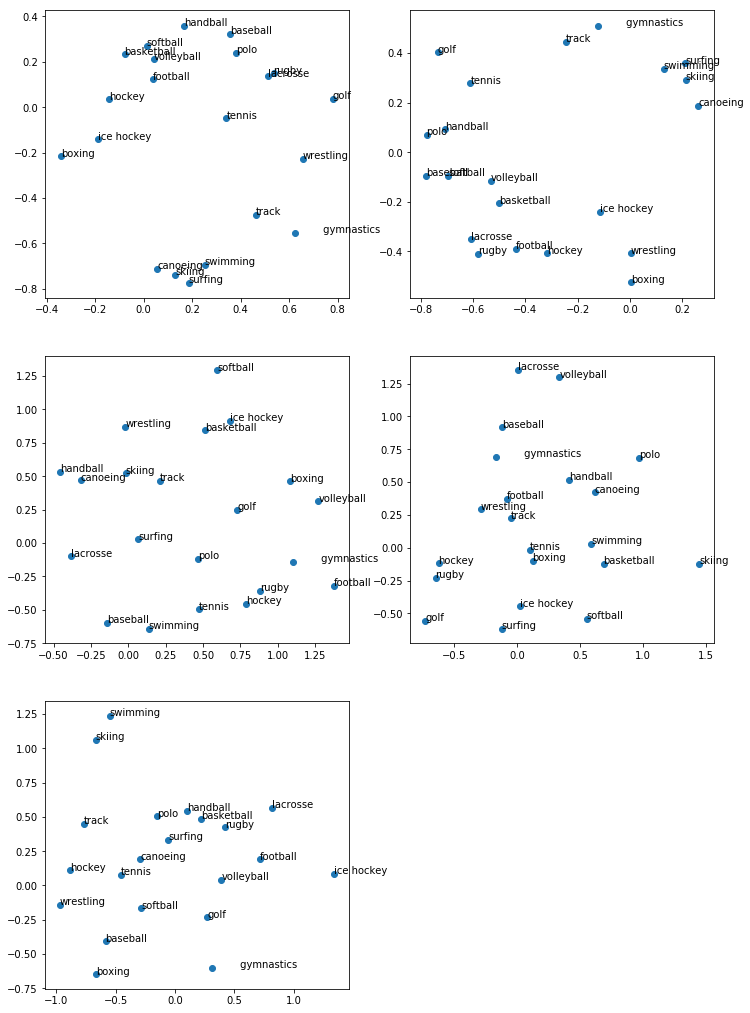

In [24]:
pos1 = np.random.normal(0.0,1.0,size=(N,D))
stress_list1 = []
curr = 1
last = -1
# Now go through and adjust the position to minimize the stress
while abs(curr - last) > 0.001:
    pos1 = pos1 - compute_full_gradient(pos1)*0.01
    stress_list1.append(sum([stress(pos1, i) for i in range(len(names))]))
    last = curr
    curr = stress_list1[-1]

x1 = []
y1 = []
for i in range(np.size(pos1,0)):
    x1.append(pos1[i][0])
    y1.append(pos1[i][1])
fig = plt.figure(figsize=(12, 18))
ax1 = fig.add_subplot(321)
ax1.scatter(x1,y1)
for i in range(len(names)):
    ax1.annotate(names[i], (x1[i], y1[i]))
    
pos2 = np.random.normal(0.0,1.0,size=(N,D))
stress_list2 = []
curr = 1
last = -1
# Now go through and adjust the position to minimize the stress
while abs(curr - last) > 0.001:
    pos2 = pos2 - compute_full_gradient(pos2)*0.01
    stress_list2.append(sum([stress(pos2, i) for i in range(len(names))]))
    last = curr
    curr = stress_list2[-1]

x2 = []
y2 = []
for i in range(np.size(pos2,0)):
    x2.append(pos2[i][0])
    y2.append(pos2[i][1])

ax2 = fig.add_subplot(322)
ax2.scatter(x2,y2)
for i in range(len(names)):
    ax2.annotate(names[i], (x2[i], y2[i]))

pos3 = np.random.normal(0.0,1.0,size=(N,D))
stress_list3 = []
curr = 1
last = -1
# Now go through and adjust the position to minimize the stress
while abs(curr - last) > 0.001:
    pos3 = pos3 - compute_full_gradient(pos3)*0.01
    stress_list3.append(sum([stress(pos3, i) for i in range(len(names))]))
    last = curr
    curr = stress_list[-1]

x3 = []
y3 = []
for i in range(np.size(pos3,0)):
    x3.append(pos3[i][0])
    y3.append(pos3[i][1])
ax3 = fig.add_subplot(323)
ax3.scatter(x3,y3)
for i in range(len(names)):
    ax3.annotate(names[i], (x3[i], y3[i]))

pos4 = np.random.normal(0.0,1.0,size=(N,D))
stress_list4 = []
curr = 1
last = -1
# Now go through and adjust the position to minimize the stress
while abs(curr - last) > 0.001:
    pos4 = pos4 - compute_full_gradient(pos4)*0.01
    stress_list4.append(sum([stress(pos4, i) for i in range(len(names))]))
    last = curr
    curr = stress_list[-1]

x4 = []
y4 = []
for i in range(np.size(pos1,0)):
    x4.append(pos4[i][0])
    y4.append(pos4[i][1])
ax4 = fig.add_subplot(324)
ax4.scatter(x4,y4)
for i in range(len(names)):
    ax4.annotate(names[i], (x4[i], y4[i]))

pos5 = np.random.normal(0.0,1.0,size=(N,D))
stress_list5 = []
curr = 1
last = -1
# Now go through and adjust the position to minimize the stress
while abs(curr - last) > 0.001:
    pos5 = pos5 - compute_full_gradient(pos5)*0.01
    stress_list5.append(sum([stress(pos5, i) for i in range(len(names))]))
    last = curr
    curr = stress_list[-1]

x5 = []
y5 = []
for i in range(np.size(pos1,0)):
    x5.append(pos5[i][0])
    y5.append(pos5[i][1])

ax5 = fig.add_subplot(325)
ax5.scatter(x5,y5)
for i in range(len(names)):
    ax5.annotate(names[i], (x5[i], y5[i]))

They are not all the same. Gradient descent is an algorithm that finds local minima, rather than a true minimum value each time. There are many of these local minima in our model, and which "valley" our algorithm ends up in depends on the initial locations of the sports in each trial. Since we random generate different points for each trial, we expect the plots for each trial to be in arbitrary rotation of each other, with points in different poisitions but still grouped in similar fashion. $\pagebreak$

# Question 5

I would pick the "best" plot to be the plot with the lowest stress after the algorithm is complete because stress is the metric of error between the reported distances and MDS generated distances.

19.28380810211572
1


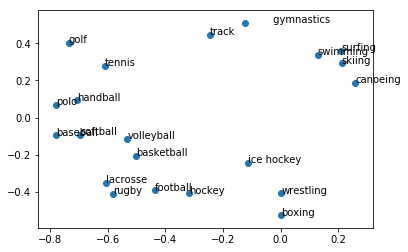

In [32]:
final_stress = [stress_list1[-1], stress_list2[-1], stress_list3[-1],
               stress_list4[-1], stress_list5[-1]]
best_stress = min(final_stress)
best = final_stress.index(best_stress)
print(best_stress)
print(best)
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(x2,y2)
for i in range(len(names)):
    ax.annotate(names[i], (x2[i], y2[i]))